In [3]:
import os
import re
import pandas
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [53]:
def convert_to_us(df):
    # Convert ns component of sending time to seconds, then combine with 
    # second component
    df['recv_t'] = df['recv_s'] + df['recv_ns'] / 1e9
    df['send_t'] = df['send_s'] + df['send_ns'] / 1e9
    
    df['rtt(us)'] = (df['recv_t'] - df['send_t']) * 1e6
    return df

In [54]:
data = """10731,800564249,10731,850882173
10731,881120882,10731,951567707
10731,961654538,10732,042197338
10732,042196449,10732,132765185
10732,122703243,10732,223337876
10732,203214419,10732,313931288
10732,283745858,10732,404486048
10732,364250946,10732,484988621
10732,444742816,10732,575617162
10732,525310109,10732,666322574
10732,605977498,10732,746862505
10732,686440633,10732,837477832
10732,766993908,10732,918039205
10732,847547292,10733,008619235
10732,777062630,10733,089154233
10733,008618332,10733,179779548
10732,928094933,10733,260304262
10733,169695095,10733,350971377
10733,250227301,10733,431543151
10733,330832721,10733,522180454
10733,411372347,10733,602697944
10733,491982253,10733,693312670
10733,572513649,10733,773837169
10733,653066651,10733,864372648
10733,733559037,10733,944859571
10733,814081824,10734,025457510
10733,894552445,10734,116020682
10733,975120086,10734,196507126
10734,055652438,10734,287107102
10734,136144822,10734,367600455
10734,216631611,10734,448087153
10734,297170511,10734,538635050
10734,377663180,10734,619135508
10734,458150304,10734,699727741
10734,538634290,10734,790284549
10734,619134745,10734,870765344
10734,699726981,10734,951288706
10734,780222267,10735,041889601
10734,860701777,10735,122368527
10734,941211349,10735,202872805
10735,021766246,10735,293457868
10735,102252275,10735,374024689
10735,182735457,10735,454497631
10735,263272616,10735,545075204
10735,343840281,10735,625583642
10735,424319958,10735,706089639
10735,504827516,10735,786570787
10735,585337349,10735,877142830
10735,665830692,10735,957658113
10735,746338706,10736,038249578
10735,826827182,10736,128801176
10735,907330125,10736,209294286
10735,987942911,10736,289848019
10736,068421693,10736,370313126
10736,148925462,10736,460856978
10736,229425970,10736,541382243
10736,309971906,10736,621919805
10736,390432087,10736,702437690
10736,470920327,10736,793064478
10736,551445210,10736,873623216
10736,632020707,10736,954178183
10736,400486380,10737,034716564
10736,793063625,10737,125349360
10736,873622084,10737,205895060
10736,954177312,10737,286411897
10736,712501349,10737,367043455
10737,115271827,10737,457674830
10737,195826864,10737,538196867
10737,276334686,10737,618749557
10737,356966621,10737,699286768
10737,437528536,10737,789873619
10737,518080971,10737,870313249
10737,598620161,10737,950806174
10737,679148511,10738,031420324
10737,759690003,10738,121974811
10737,840134244,10738,202433321
10737,920607395,10738,282956799
10738,001235795,10738,363448037
10738,081729495,10738,454010678
10738,162202351,10738,534480800
10738,242687213,10738,614979217
10738,323203202,10738,695570665
10738,403702454,10738,776091900
10738,484181391,10738,866641051
10738,564665285,10738,947135495
10738,645249619,10739,027650666
10738,725763552,10739,108135397
10738,806279380,10739,198671252
10738,886767752,10739,279191677
10738,967267348,10739,359766019
10739,047775401,10739,440249937
10739,128252074,10739,520750329
10739,208733998,10739,611304018
10739,289337271,10739,691816836
10739,369828627,10739,772301567
10739,450312840,10739,852795464
10739,530812835,10739,933288945
10739,611303171,10740,023960780
10739,691816005,10740,104423882
10739,772300711,10740,184914674
10739,852794659,10740,265468197
10739,933288101,10740,345970860
10740,013898767,10740,436497465
10740,094369340,10740,517003195
10740,174852601,10740,597501292
10740,255398380,10740,678096854
10740,335909334,10740,758573671
10740,416374730,10740,849201849
10740,496880470,10740,929821686
10740,577370842,10741,010351642
10740,657954102,10741,090868419
10740,738449483,10741,171448372
10740,818987029,10741,262115584
10740,899607468,10741,342691746
10740,980158603,10741,423237151
10741,060684386,10741,503795006
10741,141241847,10741,584305257
10741,221816457,10741,664807461
10741,302453899,10741,755384600
10741,382976180,10741,835892241
10741,463511246,10741,916376166
10741,544036428,10741,996952879
10741,624547400,10742,077472064
10741,705055434,10742,168020615
10741,785569858,10742,248497639
10741,866080879,10742,328998982
10741,946630747,10742,409638569
10742,027165886,10742,490136623
10742,107656927,10742,570614422
10742,188137228,10742,661280244
10742,268624236,10742,741787858
10742,349122569,10742,822278973
10742,429762487,10742,902779839
10742,510262634,10742,983277625
10742,590841571,10743,063776058
10742,671342908,10743,154313207
10742,751857724,10743,234790009
10742,832335066,10743,315406880
10742,912842932,10743,395905983
10742,993348055,10743,476364652
10742,600910316,10743,556862204
10743,154312453,10743,647417183
10743,234789229,10743,727889712
10743,315406097,10743,808334996
10743,395905203,10743,888775837
10743,476363887,10743,969332383
10743,073838900,10744,049798687"""

In [55]:
data = data.split("\n")

In [56]:
data = [x.split(",") for x in data]

In [57]:
data = [[float(y) for y in x] for x in data]

In [58]:
df = pandas.DataFrame(data, columns=["send_s", "send_ns", "recv_s", "recv_ns"])

In [59]:
df

,send_s,send_ns,recv_s,recv_ns
0,10731.0,800564249.0,10731.0,850882173.0
1,10731.0,881120882.0,10731.0,951567707.0
2,10731.0,961654538.0,10732.0,42197338.0
3,10732.0,42196449.0,10732.0,132765185.0
4,10732.0,122703243.0,10732.0,223337876.0
5,10732.0,203214419.0,10732.0,313931288.0
6,10732.0,283745858.0,10732.0,404486048.0
7,10732.0,364250946.0,10732.0,484988621.0
8,10732.0,444742816.0,10732.0,575617162.0
9,10732.0,525310109.0,10732.0,666322574.0


In [60]:
c_df = convert_to_us(df)

In [61]:
c_df

,send_s,send_ns,recv_s,recv_ns,recv_t,send_t,rtt(us)
0,10731.0,800564249.0,10731.0,850882173.0,10731.850882,10731.800564,50317.923999
1,10731.0,881120882.0,10731.0,951567707.0,10731.951568,10731.881121,70446.824999
2,10731.0,961654538.0,10732.0,42197338.0,10732.042197,10731.961655,80542.800000
3,10732.0,42196449.0,10732.0,132765185.0,10732.132765,10732.042196,90568.736001
4,10732.0,122703243.0,10732.0,223337876.0,10732.223338,10732.122703,100634.633000
5,10732.0,203214419.0,10732.0,313931288.0,10732.313931,10732.203214,110716.869000
6,10732.0,283745858.0,10732.0,404486048.0,10732.404486,10732.283746,120740.190001
7,10732.0,364250946.0,10732.0,484988621.0,10732.484989,10732.364251,120737.674999
8,10732.0,444742816.0,10732.0,575617162.0,10732.575617,10732.444743,130874.345999
9,10732.0,525310109.0,10732.0,666322574.0,10732.666323,10732.525310,141012.464999


In [41]:
850882173 - 800564249

50317924

In [43]:
50317924 / 1e3

50317.924

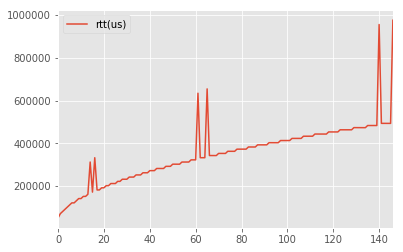

In [64]:
df.plot(y="rtt(us)")